<a href="https://colab.research.google.com/github/kbadrawy/Playing_with_Pandas/blob/main/yu-gi-oh_meets_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**PANDAS**

Loading Data 

In [60]:
# importing panda library
import pandas as pd

# loading a csv file format
card = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/card_data.csv') 

# loading from an excel file format
card_xlsx = pd.read_excel('/content/New_Data/card_data.xlsx') #loadinf from an excel file format

# printing first 3 rows using .head
print(card_xlsx.head(3))

# print all rows
print(card) 


Reading data

In [ ]:
# Reading all headers
print(card.columns)

#Reading specific columns
print ([card.ATK]) # First way 
print (card[['Name','Type','ATK']]) # Second way

#Reading all rows
print(card)

#Reading specific row
print(card.iloc[1]) # iloc-->integer location 
print(card.iloc[0:4]) # gets rows from location 1 till location 3 

#Reading from a specific location 
print(card.iloc[2,1])

#Iteration over all rows in data set
for index , row in card.iterrows():
 print(index,row['ATK'])

#Showing columns with specific atributes
card.loc[card['Level']==1]  



Describing Data



In [ ]:
card.describe()

#sorting the data according to column name descendingly
card.sort_values('Name',ascending=False) 
card.sort_values(['Type','Level'],ascending=[1,0])

Manipluating Data


In [61]:
# adding a new column
card['Sum']=card['ATK']+card['DEF'] #1st way
card['Sum']=card.iloc[:,5:7].sum(axis=1) #2nd way ; adding the columns vertically (axis=1)


# deleting certain column
card=card.drop(columns=['Sum'])

cols = list(card.columns.values)
print(cols)

# rearranging the order of columns
card=card[[cols[0]]+cols[5:7]+[cols[7]]+cols[1:5]]
print(card)

['Name', 'Type', 'Level', 'Race', 'Attribute', 'ATK', 'DEF', 'Sum']
                          Name                     Type  ...     DEF     Sum
0                Limit Reverse                Trap Card  ...     NaN     NaN
1               The 13th Grave           Normal Monster  ...   900.0  2100.0
2              Gem-Enhancement                Trap Card  ...     NaN     NaN
3            Magician's Circle                Trap Card  ...     NaN     NaN
4     Castle of Dark Illusions      Flip Effect Monster  ...  1930.0  2850.0
...                        ...                      ...  ...     ...     ...
6529                Wattcancel                Trap Card  ...     NaN     NaN
6530    Paleozoic Anomalocaris              XYZ Monster  ...     0.0  2400.0
6531             Dark Magician           Normal Monster  ...  2100.0  4600.0
6532  Odd-Eyes Pendulum Dragon  Pendulum Effect Monster  ...  2000.0  4500.0
6533           Stardust Dragon          Synchro Monster  ...  2000.0  4500.0

[6534 r

Saving to csv file



In [62]:
# saving to csv file
card.to_csv('/content/drive/MyDrive/Colab Notebooks/after_change.csv') # with saving index
card.to_csv('/content/drive/MyDrive/Colab Notebooks/after_change.csv',index=False) # without saving index

# saving to excel file
card.to_excel('/content/drive/MyDrive/Colab Notebooks/after_change.xlsx',index=False)

# saving to text file
card.to_csv('/content/drive/MyDrive/Colab Notebooks/after_change.txt')

# reading text file
card_txt=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/after_change.txt')

# renaming column
card_txt.rename(columns={'Unnamed: 0':'#'}, inplace =False)


,#,Name,Type,Level,Race,Attribute,ATK,DEF,Sum
0,0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN,NaN
1,1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0,2100.0
2,2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN,NaN
3,3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN,NaN
4,4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0,2850.0
...,...,...,...,...,...,...,...,...,...
6529,6529,Wattcancel,Trap Card,NaN,Counter,NaN,NaN,NaN,NaN
6530,6530,Paleozoic Anomalocaris,XYZ Monster,2.0,Aqua,WATER,2400.0,0.0,2400.0
6531,6531,Dark Magician,Normal Monster,7.0,Spellcaster,DARK,2500.0,2100.0,4600.0
6532,6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7.0,Dragon,DARK,2500.0,2000.0,4500.0


Filtering Data

In [63]:
card.loc[(card['Type']=='Effect Monster') & (card['Level']==8)] # gets all the rows that satisfy the conditon
card.loc[(card['Type']=='Effect Monster') & (card['Level']==8) & (card['ATK']>1200.0)] # gets all the rows that satisfy the conditon

New_card=card.loc[(card['Type']=='Effect Monster') & (card['Level']==8) & (card['ATK']>1200.0)] 
New_card.to_csv('/content/drive/MyDrive/Colab Notebooks/Filtered.csv',index=False)

New_card = New_card.reset_index(drop=True,inplace=True) #reset index and getting rid of the old ones

New_card.loc[New_card['Name'].str.contains('Dragon')] # gets all dragon cards
New_card.loc[~New_card['Name'].str.contains('Dragon')] # get all cards that are not dragons

# importing regular expressions
import re

card.loc[card['Type'].str.contains('penDulum | effect',flags= re.I ,regex=True)]
card.loc[card['Name'].str.contains('^a[a:z]*',flags= re.I ,regex=True)] #notes: 1) ^ indicates that it must start with letter a . 2) [a:z]* indicates that the rest of the name could be nothing or any of the alphabet letters


,Name,Type,Level,Race,Attribute,ATK,DEF,Sum
28,A Legendary Ocean,Spell Card,NaN,Field,NaN,NaN,NaN,NaN
30,Amplifier,Spell Card,NaN,Equip,NaN,NaN,NaN,NaN
58,Alien Ammonite,Tuner Monster,1.0,Reptile,LIGHT,500.0,200.0,700.0
63,Atlantean Marksman,Effect Monster,3.0,Sea Serpent,WATER,1400.0,0.0,1400.0
64,Amazoness Village,Spell Card,NaN,Field,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6462,Anti-Magic Arrows,Spell Card,NaN,Quick-Play,NaN,NaN,NaN,NaN
6463,Alien Shocktrooper,Normal Monster,4.0,Reptile,EARTH,1900.0,800.0,2700.0
6470,Accumulated Fortune,Trap Card,NaN,Normal,NaN,NaN,NaN,NaN
6504,Amazoness Pet Liger,Fusion Monster,7.0,Beast,EARTH,2500.0,2400.0,4900.0


Changing on condition 

In [64]:
# changing 1 column
card.loc[card['Type'] =='Trap Card','Type']='Trapper'
card.loc[card['Type'] =='Trapper','Type']='Trap Card'
card.loc[card['Type'] =='Trap Card','Level']=0.0

# # changing multiple columns
card.loc[~(card['Sum']>=0),['ATK','DEF','Sum']]=[0.0,0.0,0.0] 
print(card.shape)
card_noNaN=card.dropna()
print(card_noNaN.shape)

(6534, 8)
(4275, 8)


Aggregate Functions


In [ ]:
card.groupby(['Type']).mean().sort_values('ATK',ascending=False)
card.groupby(['Type']).sum()
card['Count']=1
card.groupby(['Type']).count()['Count']
card.groupby(['Type','Race']).count()['Count']

Large amount of data

In [ ]:
# iterating over 5 rows at a time
i=0
for card in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/after_change.csv',chunksize=5):
    i=i+1
    print('CHUNK',i)
    print(card)




Plotting


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


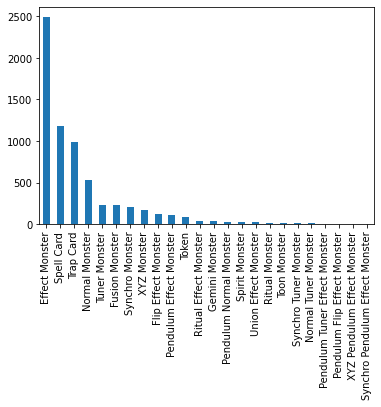

In [34]:
import re

card['Type'].value_counts().plot(kind='bar') #Before

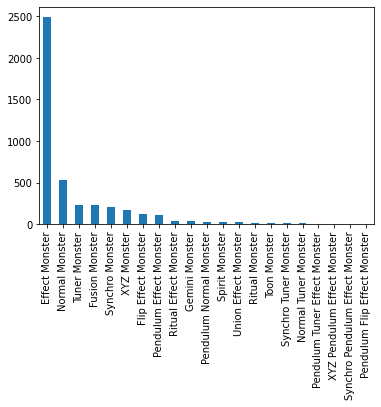

In [65]:
card_noNaN['Type'].value_counts().plot(kind='bar') #After

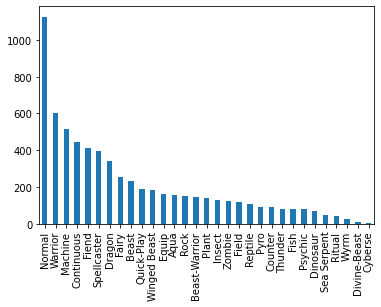

In [35]:
card['Race'].value_counts().plot(kind='bar') #Before

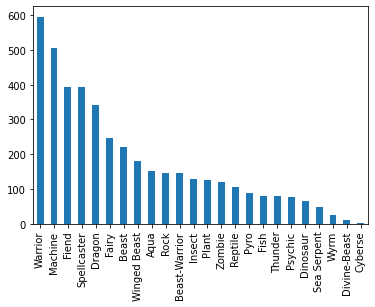

In [66]:
card_noNaN['Race'].value_counts().plot(kind='bar') #After

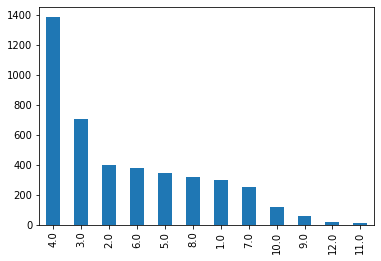

In [36]:

card['Level'].value_counts().plot(kind='bar') #Before

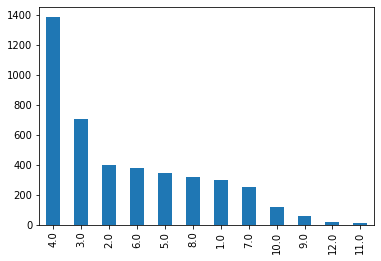

In [67]:
card_noNaN['Level'].value_counts().plot(kind='bar') #After